In [ ]:
!pip install Embeddings==0.0.8
!pip install np_utils
!pip install scikit-plot
!pip install gensim==3.8.3
!pip install vecstack
import nltk
nltk.download('stopwords')

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

"""
Fake news detection
LSTM model
"""
import getEmbeddings
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras 
from tensorflow.keras import backend as K
import pandas as pd
import np_utils
from sklearn.linear_model import LinearRegression
from vecstack import stacking
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Embedding, Input, RepeatVector,Bidirectional
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import scikitplot.plotters as skplt
import os
from tensorflow.keras.datasets import imdb
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing import sequence
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression



top_words = 5000
epoch_num = 8
batch_size = 128




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import pickle

In [ ]:
from sklearn.model_selection import train_test_split
train_ratio = 0.70
validation_ratio = 0.20
test_ratio = 0.10


path = 'datasets/news_articles.csv'
vector_dimension=300

data = pd.read_csv(path)

missing_rows = []
for i in range(len(data)):
        if data.loc[i, 'text'] != data.loc[i, 'text']:
            missing_rows.append(i)
data = data.drop(missing_rows).reset_index().drop(['index','id'],axis=1)

for i in range(len(data)):
        data.loc[i, 'text'] = getEmbeddings.cleanup(data.loc[i,'text'])

data = data.sample(frac=1).reset_index(drop=True)

x_l = data.loc[:,'text'].values
y_l = data.loc[:,'label'].values
y_l = np.where(y_l=="Real", 0, 1)


xtr, xte, y_train, y_test = train_test_split(
    x_l, y_l, test_size=1 - train_ratio)
 
# performing test validation split
xvl, xte, y_val, y_test = train_test_split(
    xte, y_test, test_size=test_ratio/(test_ratio + validation_ratio))

In [ ]:

# # Read the text data
# if not os.path.isfile('./xtr_shuffled.npy') or \
#     not os.path.isfile('./xte_shuffled.npy') or \
#     not os.path.isfile('./ytr_shuffled.npy') or \
#     not os.path.isfile('./yte_shuffled.npy'):
#     getEmbeddings.clean_data()


# xtr = np.load('./xtr_shuffled.npy', allow_pickle=True)
# xte = np.load('./xte_shuffled.npy', allow_pickle=True)
# y_train = np.load('./ytr_shuffled.npy', allow_pickle=True)
# y_test = np.load('./yte_shuffled.npy', allow_pickle=True)

cnt = Counter()
x_train = []
for x in xtr:
    x_train.append(x.split())
    for word in x_train[-1]:
        cnt[word] += 1  




In [ ]:
# Storing most common words
most_common = cnt.most_common(top_words + 1)
word_bank = {}
id_num = 1
for word, freq in most_common:
    word_bank[word] = id_num
    id_num += 1



In [ ]:
# Encode the sentences
for news in x_train:
    i = 0
    while i < len(news):
        if news[i] in word_bank:
            news[i] = word_bank[news[i]]
            i += 1
        else:
            del news[i]

y_train = list(y_train)
y_test = list(y_test)
y_val=list(y_val)


In [ ]:
# Delete the short news
i = 0
while i < len(x_train):
    if len(x_train[i]) > 10:
        i += 1
    else:
        del x_train[i]
        del y_train[i]

# Generating test data
x_test = []
for x in xte:
    x_test.append(x.split())

# Encode the sentences
for news in x_test:
    i = 0
    while i < len(news):
        if news[i] in word_bank:
            news[i] = word_bank[news[i]]
            i += 1
        else:
            del news[i]


# Generating val data
x_val = []
for x in xvl:
    x_val.append(x.split())

# Encode the sentences
for news in x_val:
    i = 0
    while i < len(news):
        if news[i] in word_bank:
            news[i] = word_bank[news[i]]
            i += 1
        else:
            del news[i]

# Truncate and pad input sequences
max_review_length = 300
X_train = sequence.pad_sequences(x_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(x_test, maxlen=max_review_length)
X_val = sequence.pad_sequences(x_val, maxlen=max_review_length)

# Convert to numpy arrays
y_train = np.array(y_train)
y_test = np.array(y_test)
y_val=np.array(y_val)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)

(1357, 300)
(206, 300)
(206,)


In [ ]:

with open('lstm.sav' , 'rb') as f:
    model_1 = pickle.load(f)
with open('blstm.sav' , 'rb') as f:
    model_2 = pickle.load(f)
 
# putting all base model objects in one list
all_models = [model_1, model_2]

In [ ]:
# training first model
model_1.fit(X_train, y_train)
val_pred_1 = model_1.predict(X_val)
test_pred_1 = model_1.predict(X_test)
 
# converting to dataframe
val_pred_1 = pd.DataFrame(val_pred_1)
test_pred_1 = pd.DataFrame(test_pred_1)
print(val_pred_1)




43/43 [==============================] - 210s 5s/step - loss: 0.6480 - accuracy: 0.6352
            0
0    0.552314
1    0.655470
2    0.504447
3    0.523276
4    0.675721
..        ...
405  0.497614
406  0.662251
407  0.587859
408  0.698442
409  0.430837

[410 rows x 1 columns]


In [ ]:

print(test_pred_1.shape)
print(val_pred_1.shape)
print(len(x))

(206, 1)
(410, 1)
138


In [ ]:
# training second model
model_2.fit(X_train, y_train)
val_pred_2 = model_2.predict(X_val)
test_pred_2 = model_2.predict(X_test)
 
# converting to dataframe
val_pred_2 = pd.DataFrame(val_pred_2)
test_pred_2 = pd.DataFrame(test_pred_2)

43/43 [==============================] - 33s 628ms/step - loss: 0.6779 - accuracy: 0.5991


In [ ]:
X_val = pd.DataFrame(X_val)
val_pred_1 = pd.DataFrame(val_pred_1)
val_pred_2 = pd.DataFrame(val_pred_2)
df_val = pd.concat([X_val, val_pred_1, val_pred_2], axis=1)
df_val=np.array(df_val)


In [ ]:
X_test = pd.DataFrame(X_test)
test_pred_1 = pd.DataFrame(test_pred_1)
test_pred_2 = pd.DataFrame(test_pred_2)
df_test = pd.concat([X_test, test_pred_1, test_pred_2], axis=1)
df_test=np.array(df_test)

In [ ]:
print(df_val)
print(y_val)

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 2.21000000e+02
  5.52313685e-01 5.71286738e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 3.67000000e+02
  6.55469596e-01 6.49541974e-01]
 [2.07000000e+02 2.23600000e+03 1.66600000e+03 ... 1.78300000e+03
  5.04447341e-01 3.95296156e-01]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.74200000e+03
  5.87859094e-01 7.06915319e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 2.30300000e+03
  6.98441744e-01 6.41879082e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 4.18000000e+02
  4.30836916e-01 5.27315378e-01]]
[1 1 0 1 1 0 1 1 0 0 1 1 1 0 1 1 0 0 1 0 1 1 0 0 0 1 0 1 1 1 1 1 0 0 1 1 0
 0 1 1 0 0 1 0 1 1 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 1 1 0 1 0 0 1 1 0 0 0 0
 1 0 1 0 1 1 0 1 0 0 1 1 1 0 0 0 0 0 0 0 1 1 1 1 0 0 1 0 1 0 0 1 1 1 1 1 1
 0 1 0 1 0 1 0 0 1 0 0 1 0 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 0
 1 0 1 1 1 1 0 0 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1 1 0 0
 1 0 1 1 1 1 1 1 1 1 1 1 

In [ ]:
# concatenating validation dataset along with all the predicted validation data (meta features)
# making the final model using the meta features
# final_model=LogisticRegression(solver='liblinear', random_state=0)
final_model = LinearRegression()
final_model.fit(df_val, y_val)
 
# getting the final output
final_pred = final_model.predict(df_test)

In [ ]:

 
# # computing the stack features
# s_train, s_test = stacking(all_models, X_train, y_train, X_test,regression = True, n_folds = 4, shuffle=True )
 
# # initializing the second-level model
# final_model = model_1
 
# # fitting the second level model with stack features
# final_model = final_model.fit(s_train, y_train)
 
# # predicting the final output using stacking
# pred_final = final_model.predict(X_test)
 
# # printing the root mean squared error between real value and predicted value
# # print(mean_squared_error(y_test, pred_final))

In [ ]:
y_pred = final_pred
y_pred = np.where(y_pred>0.5, 1, 0)

In [ ]:
print(final_pred)

[  2.20283611  -0.82881397   0.5087155   -0.59811726   0.55583875
  -4.99750488   0.73265188   0.71987454   8.12056164   3.46919637
   3.4476243    7.40519412   1.3450734    0.77654689   0.33863362
  10.12536045   5.60808731   0.64669139  -0.05270402   0.65678938
   0.09679867   0.67482199  -0.29921214  17.11430931   0.39939304
  -1.12326639   0.71550838   0.43698827  -1.47429403  -8.1316471
   1.1081415    0.49356832   0.68776562   3.71191074   2.22126357
   0.85832189   0.41271646   5.08307488   0.75262844  -1.16526875
   0.95670479   1.20796239   0.45041041   0.74841499   9.08471048
   0.36884459   0.82389603   0.3603207    2.04704119   3.25192022
   0.40608904   1.1526293   -0.06608354   1.34215185   8.91874228
  -1.34755101  -1.7115692    2.04618438 -12.0338007    2.69955039
   1.58753878   1.42030215   1.69242692   0.13612949   0.48915825
   2.16441192   0.54455002   1.65231073   0.75547969   0.76970154
  -1.48303187   0.3282016    0.64326229   0.73341303   0.78621524
   0.573913

In [ ]:
m = y_test.shape[0]
tp=0
tn=0
fp=0
fn=0
for i in range(m):
    if (y_pred[i]==0 and (y_test[i]!=y_pred[i])):
        fn+=1
    elif (y_pred[i]==1 and (y_test[i]!=y_pred[i])):
        fp+=1
    elif (y_pred[i]==0 and (y_test[i]==y_pred[i])):
        tn+=1
    elif (y_pred[i]==1 and (y_test[i]==y_pred[i])):
        tp+=1

precision=(tp)/(tp+fp)*100
recall=(tp)/(tp+fn)*100
print("Accuracy = " + format((tp+tn)/(tp+tn+fp+fn)*100, '.2f') + "%")   
print("F1-Score = " + format(((2*precision*recall)/(precision+recall)), '.2f') + "%")   
print("Recall = " + format((tp)/(tp+fn)*100, '.2f') + "%")   
print("Precision = " + format((tp)/(tp+fp)*100, '.2f') + "%")   
print("Specificity = " + format((tn)/(tn+fp)*100, '.2f') + "%")  

Accuracy = 57.77%
F1-Score = 66.15%
Recall = 63.43%
Precision = 69.11%
Specificity = 47.22%


/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_confusion_matrix instead.
  warnings.warn(msg, category=FutureWarning)


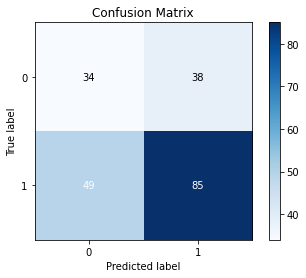

In [ ]:
# Draw the confusion matrix
def plot_cmat(y_test, ypred):
    '''Plotting confusion matrix'''
    skplt.plot_confusion_matrix(y_test, ypred)
    plt.grid(False)
    plt.show()
    
plot_cmat(y_test, y_pred)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=3a2c2a1b-c190-4238-a7b0-93cabb99b4e1' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>